In [12]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import matplotlib.pyplot as plt

In [13]:
df=pd.read_csv(r"../data/attrition_data_with_calculated_columns.csv")
df.drop(['EMP_ID', 'TERMINATION_YEAR', 'COMBINED_JOB_GROUP', 'DISCRETIZED_ANNUAL_RATE', 'DISCRETIZED_AGE', 'PREVYR_1_PRESENT', 'PREVYR_2_PRESENT', 'PREVYR_3_PRESENT', 'PREVYR_4_PRESENT', 'PREVYR_5_PRESENT'], axis = 1, inplace=True)
df=df.replace({'STATUS': {'T': 1, 'A': 0}})

In [14]:
x=df.drop(['STATUS'], axis=1)
y=df['STATUS']

In [15]:
x = pd.get_dummies(x, columns=['REFERRAL_SOURCE', 'ETHNICITY', 'SEX', 'MARITAL_STATUS', 'NUMBER_OF_TEAM_CHANGED', 'HIRE_MONTH', 'IS_FIRST_JOB', 'TRAVELLED_REQUIRED', 'DISABLED_EMP', 'DISABLED_VET', 'JOB_GROUP'])

In [16]:
to_be_label_encoded = ['EDUCATION_LEVEL']
label_encoder = LabelEncoder()
for column in to_be_label_encoded:
    x[column] = label_encoder.fit_transform(x[column])

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [18]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [19]:
clf = MLPClassifier(activation = 'relu', solver='adam', alpha=1e-5,
                    hidden_layer_sizes=(5,2), learning_rate='constant', max_iter=1000, random_state=42,warm_start=True)

clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(accuracy_score(y_pred,y_test))

0.6979889042995839


In [20]:
y_pred_prob = clf.predict_proba(x_test)[:, 1]

<Figure size 432x288 with 0 Axes>

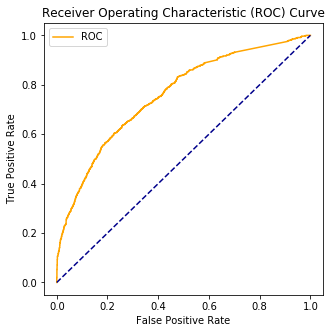

In [21]:
plt.figure(0).clf()
fpr, tpr, thresh = metrics.roc_curve(y_test, y_pred_prob)
auc = metrics.roc_auc_score(y_test, y_pred_prob)
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.savefig('ANN ROC', dpi=150)
plt.legend(loc=0)

In [22]:
confusion_matrix(y_test, y_pred)

array([[1263,  362],
       [ 509,  750]])